<a href="https://colab.research.google.com/github/Titaniaurera/Strategi-Berbasis-Data-Analisis-Tren-dan-Peramalan-Pendapatan-Ritel/blob/main/Analisis_dan_peramalan_revenue_retail_data_company_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install openpyxl


In [ ]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df['CustomerID'].fillna('Unknown', inplace=True)
# Hapus baris dengan Description yang null
df_cleaned = df.dropna(subset=['Description'])

# Simpan ke file CSV baru di Google Drive
file_path = "/content/drive/MyDrive/Online_Retail_Cleaned.csv"
df_cleaned.to_csv(file_path, index=False)

print("File berhasil disimpan di Google Drive:", file_path)

File berhasil disimpan di Google Drive: /content/drive/MyDrive/Online_Retail_Cleaned.csv


In [ ]:
# Ubah InvoiceDate menjadi format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Cek transaksi dengan Quantity atau UnitPrice negatif
print(df[df['Quantity'] < 0])
print(df[df['UnitPrice'] < 0])

# Buat dua versi dataset:
# 1. Versi normal tanpa retur (untuk analisis penjualan)
df_clean = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()

# 2. Versi khusus untuk analisis retur
df_returns = df[df['Quantity'] < 0].copy()

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  
141    2010-12-01 09:41:00      27.50    145

In [ ]:
# Buat kolom Total Revenue (pendapatan per transaksi)
df_clean['TotalRevenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Buat kolom Bulan & Tahun untuk analisis tren
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

# Tampilkan hasil
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [ ]:
# Hapus transaksi dengan InvoiceNo yang mengandung 'C' (biasanya pembatalan)
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.contains('C', na=False)]

# Cek jumlah baris dan kolom setelah penghapusan
print(df_clean.shape)

(530104, 10)


In [ ]:
df_clean.to_csv("/content/drive/MyDrive/retail_cleaned.csv", index=False)
df_returns.to_csv("/content/drive/MyDrive/retail_return.csv", index=False)

In [ ]:
# Load dataset yang sudah dibersihkan
df_clean = pd.read_csv('/content/drive/MyDrive/retail_cleaned.csv')

# Cek beberapa baris pertama
df_clean.head()

<ipython-input-28-e112f8ccfe5a>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv('/content/drive/MyDrive/retail_cleaned.csv')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


## **Analisis Penjualan**
# 1. Produk Terlaris Berdasarkan Quantity

In [ ]:
top_products = df_clean.groupby('StockCode')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False)

# Tampilkan 10 produk terlaris
top_products.head(10)

,StockCode,Quantity
2465,23843,80995
2020,23166,78033
1109,22197,56921
2909,84077,55047
3387,85099B,48474
3407,85123A,37660
3194,84879,36461
439,21212,36419
1942,23084,30788
1374,22492,26633


**Visualisasi Produk Terlaris**

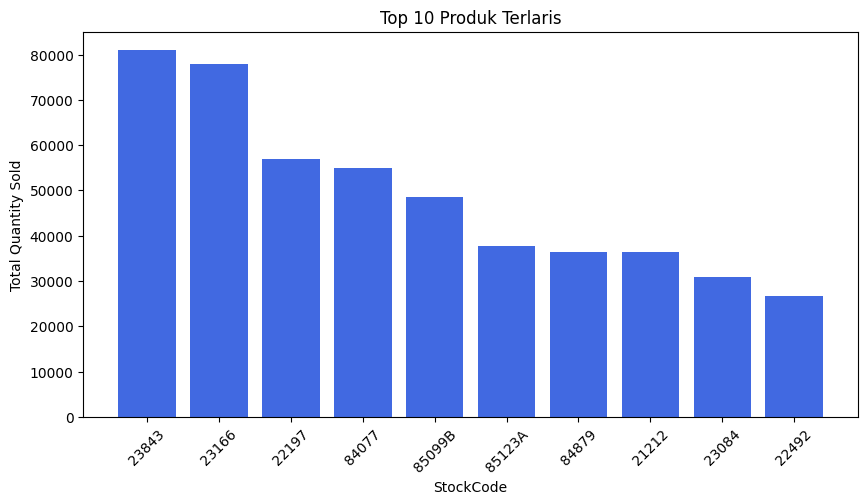

In [ ]:
import matplotlib.pyplot as plt

top_10 = top_products.head(10)
plt.figure(figsize=(10,5))
plt.bar(top_10['StockCode'], top_10['Quantity'], color='royalblue')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Produk Terlaris')
plt.xticks(rotation=45)
plt.show()

## 2.Produk dengan revenue tertinggi


In [ ]:
df_clean['TotalRevenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

top_revenue = df_clean.groupby('StockCode')['TotalRevenue'].sum().reset_index()
top_revenue = top_revenue.sort_values(by='TotalRevenue', ascending=False)
# Tampilkan 10 produk dengan revenue tertinggi
top_revenue.head(10)

,StockCode,TotalRevenue
3911,DOT,206248.77
1310,22423,174484.74
2465,23843,168469.60
3407,85123A,104518.80
2670,47566,99504.33
3387,85099B,94340.05
2020,23166,81700.92
3912,M,78110.27
3914,POST,78101.88
1942,23084,66964.99


**Visualisasi**

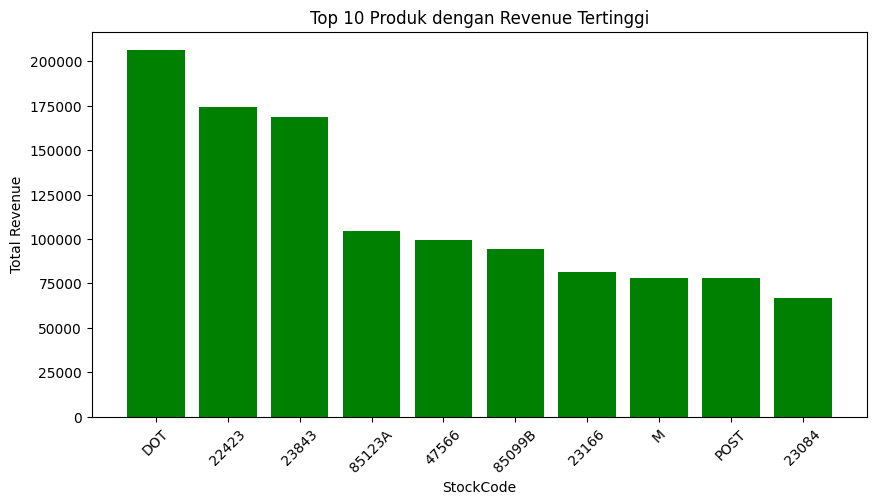

In [ ]:
top_10_revenue = top_revenue.head(10)
plt.figure(figsize=(10,5))
plt.bar(top_10_revenue['StockCode'], top_10_revenue['TotalRevenue'], color='green')
plt.xlabel('StockCode')
plt.ylabel('Total Revenue')
plt.title('Top 10 Produk dengan Revenue Tertinggi')
plt.xticks(rotation=45)
plt.show()

## 3. Tren Penjualan Berdasarkan Waktu

In [ ]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean.set_index('InvoiceDate', inplace=True)

# Agregasi total penjualan harian
daily_sales = df_clean.resample('D')['TotalRevenue'].sum()

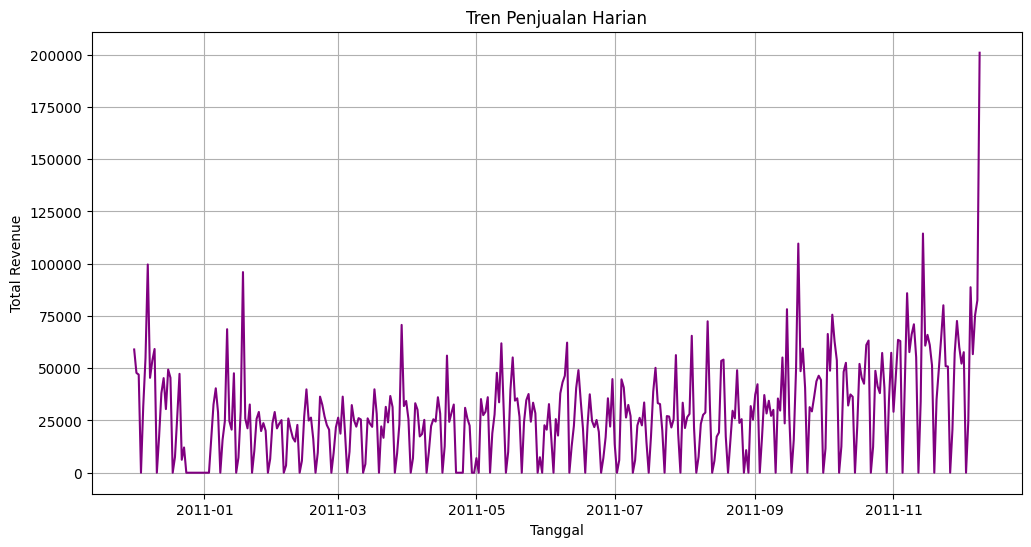

In [ ]:
# Visualisasi tren penjualan
plt.figure(figsize=(12,6))
plt.plot(daily_sales, color='purple')
plt.xlabel('Tanggal')
plt.ylabel('Total Revenue')
plt.title('Tren Penjualan Harian')
plt.grid()
plt.show()

## 4. Analisis Kontribusi Penjualan Berdasarkan Negara

In [ ]:
country_sales = df_clean.groupby('Country')['TotalRevenue'].sum().reset_index()
country_sales = country_sales.sort_values(by='TotalRevenue', ascending=False)

# Tampilkan 10 negara dengan penjualan tertinggi
country_sales.head(10)

,Country,TotalRevenue
36,United Kingdom,9025222.084
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110
0,Australia,138521.310
31,Spain,61577.110
33,Switzerland,57089.900
3,Belgium,41196.340
32,Sweden,38378.330


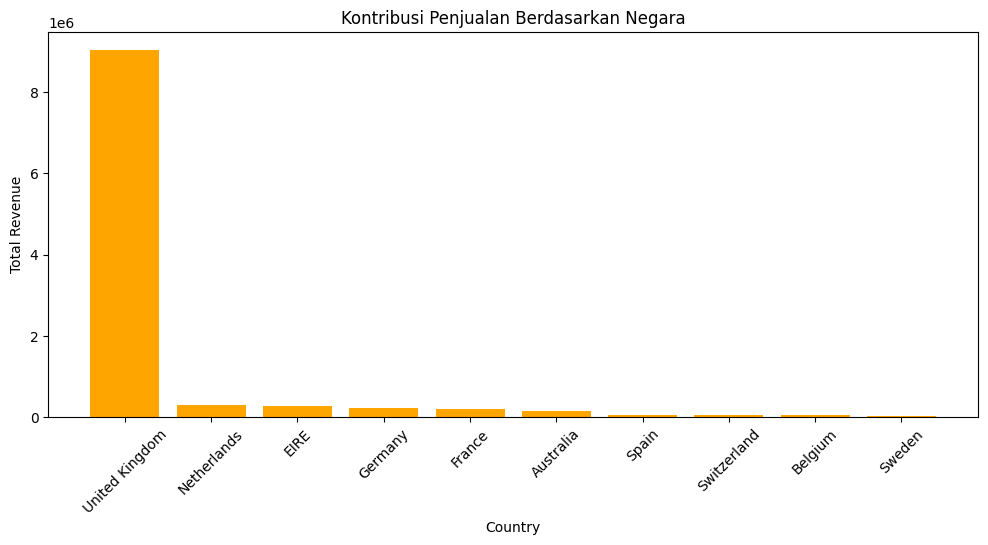

In [ ]:
top_10_countries = country_sales.head(10)
plt.figure(figsize=(12,5))
plt.bar(top_10_countries['Country'], top_10_countries['TotalRevenue'], color='orange')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Kontribusi Penjualan Berdasarkan Negara')
plt.xticks(rotation=45)
plt.show()

Apa Itu RFM Analysis?
RFM (Recency, Frequency, Monetary) adalah metode untuk mengelompokkan pelanggan berdasarkan:

Recency (R) 🕒 → Seberapa baru pelanggan terakhir kali bertransaksi.
Frequency (F) 🔁 → Seberapa sering pelanggan melakukan transaksi.
Monetary (M) 💰 → Total uang yang dihabiskan pelanggan.

*  ListHitung nilai R, F, M untuk setiap pelanggan
*  Beri skor RFM (1-5) untuk setiap pelanggan

*   Segmentasikan pelanggan berdasarkan RFM
*   Visualisasi hasil segmentasi




💰 **Step 1: Hitung RFM Metrics**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/retail_cleaned.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Tentukan tanggal referensi (misal data terakhir = 2023-12-31)
reference_date = df['InvoiceDate'].max()

# Hitung RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (jumlah transaksi unik)
    'Quantity': lambda x: (x * df.loc[x.index, 'UnitPrice']).sum()  # Monetary (total pembelian)
})

<ipython-input-40-d8b5ce2108ba>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/retail_cleaned.csv")


In [ ]:
# Rename kolom
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Hapus pelanggan dengan Monetary <= 0 (karena bisa jadi retur)
rfm = rfm[rfm['Monetary'] > 0]

# Cek hasil
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


**📊 Step 3: Skor RFM (1-5)**

In [ ]:
# Buat skor RFM (1-5) dengan quantile
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Gabungkan jadi satu skor RFM
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,1,7,4310.00,5,5,5,555
12348.0,74,4,1797.24,2,4,4,244
12349.0,18,1,1757.55,4,1,4,414
12350.0,309,1,334.40,1,1,2,112


In [ ]:
def segment_customer(rfm):
    if rfm['RFM_Score'] in ['555', '554', '545', '544']:
        return 'Best Customers'
    elif rfm['RFM_Score'] in ['543', '535', '533']:
        return 'Loyal Customers'
    elif rfm['RFM_Score'] in ['525', '524', '523']:
        return 'Potential Loyalists'
    elif rfm['RFM_Score'] in ['515', '514', '513']:
        return 'Recent Customers'
    elif rfm['RFM_Score'] in ['455', '454', '445']:
        return 'At Risk'
    elif rfm['RFM_Score'] in ['155', '144', '133']:
        return 'Lost Customers'
    else:
        return 'Others'

# Terapkan ke dataset
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Cek jumlah pelanggan di setiap segmen
rfm['Segment'].value_counts()

,count
Segment,
Others,3304
Best Customers,558
At Risk,283
Loyal Customers,103
Lost Customers,58
Potential Loyalists,27
Recent Customers,6


**📈 Step 5: Visualisasi**

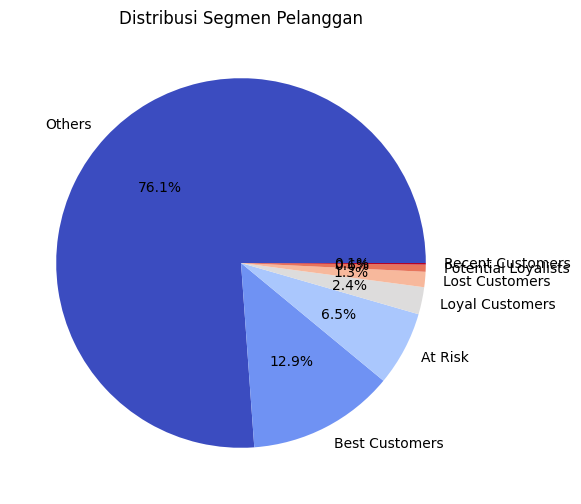

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pie Chart untuk distribusi segmen pelanggan
plt.figure(figsize=(10,6))
rfm['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm')
plt.ylabel('')
plt.title('Distribusi Segmen Pelanggan')
plt.show()

Dari grafik "Distribusi Segmen Pelanggan" ini, kita bisa mendapatkan beberapa insight penting:

Dominasi Segmen "Others":

Sebagian besar pelanggan (76.1%) masuk ke dalam segmen "Others". Ini mengindikasikan bahwa mayoritas pelanggan tidak memiliki pola perilaku yang jelas atau konsisten untuk dikategorikan ke dalam segmen lain yang lebih spesifik.
Hal ini bisa menjadi indikasi bahwa strategi pemasaran dan retensi pelanggan perlu ditingkatkan untuk menarik pelanggan agar lebih terlibat dan loyal.
Segmen "Best Customers" Cukup Besar:

Segmen "Best Customers" memiliki persentase yang cukup besar (12.9%). Ini menunjukkan bahwa ada sekelompok pelanggan yang sangat berharga bagi perusahaan.
Fokus pada mempertahankan dan meningkatkan loyalitas segmen ini sangat penting untuk pertumbuhan bisnis.
Segmen "At Risk" Memerlukan Perhatian:

Segmen "At Risk" memiliki persentase 6.5%. Ini adalah pelanggan yang berpotensi hilang jika tidak ada tindakan yang diambil.
Perusahaan perlu mengidentifikasi alasan mengapa pelanggan ini berisiko dan mengembangkan strategi untuk mempertahankan mereka.
Segmen Lainnya Kecil:

Segmen "Lost Customers" (2.4%), "Loyal Customers" (0.1%), "Potential Loyalists" (0.1%), dan "Recent Customers" (0.1%) memiliki persentase yang sangat kecil.
Ini mungkin mengindikasikan bahwa strategi untuk menarik dan mempertahankan pelanggan di segmen-segmen ini kurang efektif atau perlu penyesuaian.
Pentingnya Personalisasi:

Dengan mayoritas pelanggan berada di segmen "Others", perusahaan perlu berinvestasi dalam personalisasi untuk memahami kebutuhan dan preferensi individu.
Penggunaan data dan analisis perilaku pelanggan dapat membantu menciptakan pengalaman yang lebih relevan dan menarik.
Secara Keseluruhan:

Grafik ini menunjukkan bahwa perusahaan memiliki peluang besar untuk meningkatkan loyalitas pelanggan dan mengoptimalkan strategi pemasaran.
Fokus pada segmen "Best Customers" dan "At Risk" sangat penting, serta upaya untuk memahami dan melibatkan segmen "Others" melalui personalisasi.

**💻 Step 1: Load Dataset Retur**

In [ ]:
df_returns = pd.read_csv("/content/drive/MyDrive/retail_return.csv")

# Cek struktur data
df_returns.info()
df_returns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10624 entries, 0 to 10623
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10624 non-null  object 
 1   StockCode    10624 non-null  object 
 2   Description  9762 non-null   object 
 3   Quantity     10624 non-null  int64  
 4   InvoiceDate  10624 non-null  object 
 5   UnitPrice    10624 non-null  float64
 6   CustomerID   10624 non-null  object 
 7   Country      10624 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 664.1+ KB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
1,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
2,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
3,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
4,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


**📊 Step 2: Identifikasi Jumlah Retur per Produk & Pelanggan**

In [ ]:
# Hitung jumlah retur per produk
returns_per_product = df_returns.groupby('StockCode')['Quantity'].sum().reset_index()
returns_per_product = returns_per_product.sort_values(by='Quantity', ascending=False)

# Hitung jumlah retur per pelanggan
returns_per_customer = df_returns.groupby('CustomerID')['Quantity'].sum().reset_index()
returns_per_customer = returns_per_customer.sort_values(by='Quantity', ascending=False)

# Cek produk yang paling sering dikembalikan
returns_per_product.head()

,StockCode,Quantity
2273,84964B,-1
2043,84006,-1
1783,35598D,-1
445,21594,-1
1528,23180,-1


**💰 Step 3: Analisis Nilai Total Retur**

In [ ]:
return_count = df_returns['Quantity'].value_counts().sort_index()
print(return_count)

Quantity
-80995       1
-74215       1
-9600        2
-9360        1
-9058        1
          ... 
-5         235
-4         502
-3         620
-2        1395
-1        4184
Name: count, Length: 329, dtype: int64


**📈 Step 5: Visualisasi Hasil**

<ipython-input-56-6fc64f3cb50b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_count.index, y=return_count.values, palette='magma')


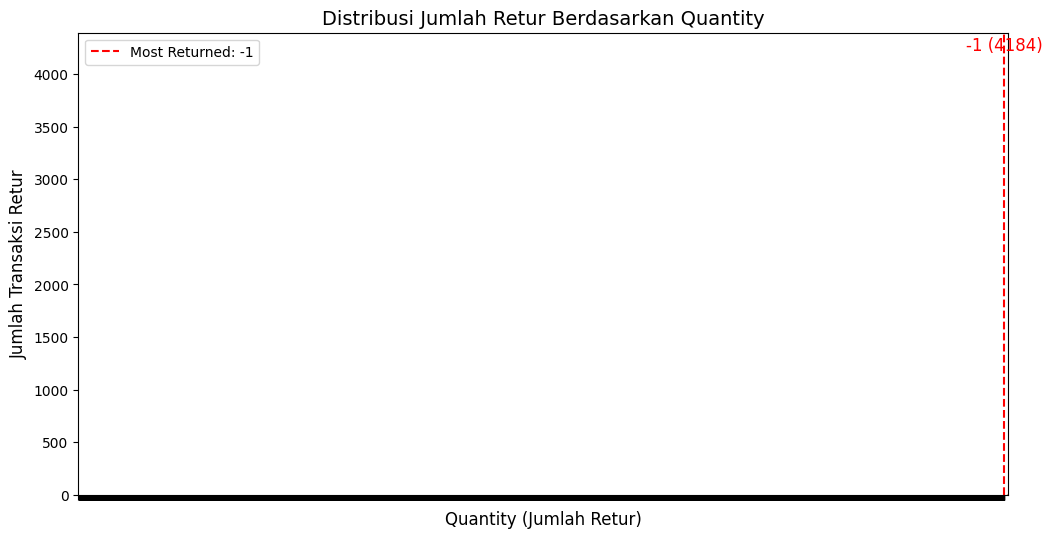

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan step untuk X-axis (misalnya setiap -10, -50, -100, dst)
x_ticks = np.arange(return_count.index.min(), 1, 10)  # Setiap 10

# Plot jumlah retur berdasarkan Quantity
plt.figure(figsize=(12,6))
sns.barplot(x=return_count.index, y=return_count.values, palette='magma')

# Menandai Quantity dengan retur terbanyak
most_returned_qty = return_count.idxmax()
most_returned_count = return_count.max()
plt.axvline(x=most_returned_qty, color='red', linestyle='--', label=f'Most Returned: {most_returned_qty}')
plt.text(most_returned_qty, most_returned_count, f'{most_returned_qty} ({most_returned_count})',
         ha='center', va='bottom', fontsize=12, color='red')

# Set ticks agar loncat-loncat (hanya menampilkan -10, -50, -100, dst)
plt.xticks(x_ticks, rotation=45)

# Tambahkan judul dan label
plt.title('Distribusi Jumlah Retur Berdasarkan Quantity', fontsize=14)
plt.xlabel('Quantity (Jumlah Retur)', fontsize=12)
plt.ylabel('Jumlah Transaksi Retur', fontsize=12)
plt.legend()

# Tampilkan plot
plt.show()

<ipython-input-58-fe722c810546>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=returns_per_product_sorted.head(10), x='StockCode', y='Quantity', palette='coolwarm')


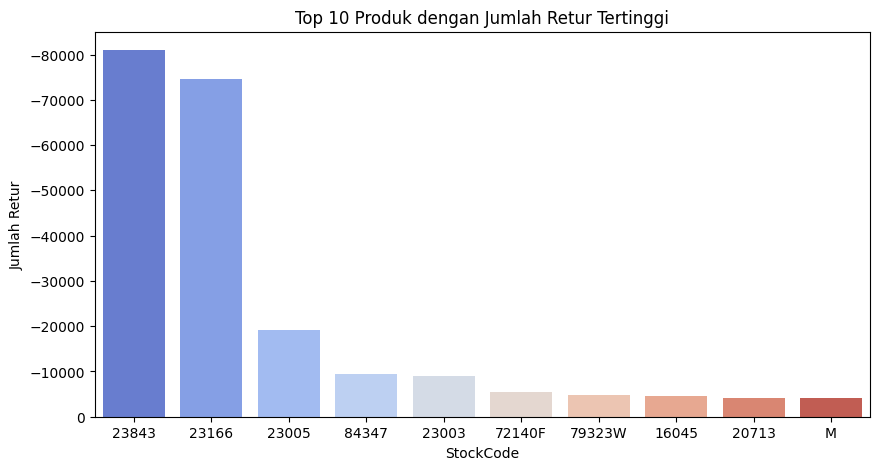

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Urutkan berdasarkan nilai negatifnya
returns_per_product_sorted = returns_per_product.sort_values(by='Quantity')

plt.figure(figsize=(10,5))
sns.barplot(data=returns_per_product_sorted.head(10), x='StockCode', y='Quantity', palette='coolwarm')

plt.title('Top 10 Produk dengan Jumlah Retur Tertinggi')
plt.xlabel('StockCode')
plt.ylabel('Jumlah Retur')

plt.gca().invert_yaxis()  # Balik sumbu Y agar semakin negatif semakin tinggi
plt.show()


#**Forecasting**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/retail_cleaned.csv")
df

<ipython-input-89-157db3a6ead8>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/retail_cleaned.csv")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


In [ ]:
unique_countries = df['Country'].unique()
print(unique_countries)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [ ]:
print(df.dtypes)

InvoiceNo        object
StockCode        object
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID       object
Country          object
TotalRevenue    float64
YearMonth        object
dtype: object


In [ ]:
print(data['InvoiceDate'].dtype)

datetime64[ns]


In [ ]:
import pandas as pd

# Load data
data = pd.read_csv("/content/drive/MyDrive/retail_cleaned.csv")

# Konversi InvoiceDate ke datetime jika belum
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Pastikan InvoiceDate sudah dalam format datetime
print(data['InvoiceDate'].dtype)  # Harusnya outputnya datetime64[ns]

# Extract Month and Year
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year

# Simpan ke file CSV baru
data.to_csv("/content/drive/MyDrive/retail_with_month_year.csv", index=False)

<ipython-input-99-999aa0e7f4ad>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/retail_cleaned.csv")


datetime64[ns]


In [ ]:
bf=pd.read_csv("/content/drive/MyDrive/retail_with_month_year.csv")
bf

<ipython-input-102-3d1ee70616e8>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bf=pd.read_csv("/content/drive/MyDrive/retail_with_month_year.csv")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,YearMonth,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12,12,2011
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,12,2011
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,12,2011
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,12,2011


In [ ]:
print(bf.dtypes)

InvoiceNo        object
StockCode        object
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID       object
Country          object
TotalRevenue    float64
YearMonth        object
Month             int64
Year              int64
dtype: object


<ipython-input-104-fadcc03a97b8>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/retail_with_month_year.csv")


|              | Quantity    | UnitPrice   | Month       | TotalRevenue   |
|:-------------|:------------|:------------|:------------|:---------------|
| Quantity     | 1           | -0.00377254 | -0.0023355  | 0.907338       |
| UnitPrice    | -0.00377254 | 1           | 0.000251078 | 0.137404       |
| Month        | -0.0023355  | 0.000251078 | 1           | 0.000316085    |
| TotalRevenue | 0.907338    | 0.137404    | 0.000316085 | 1              |


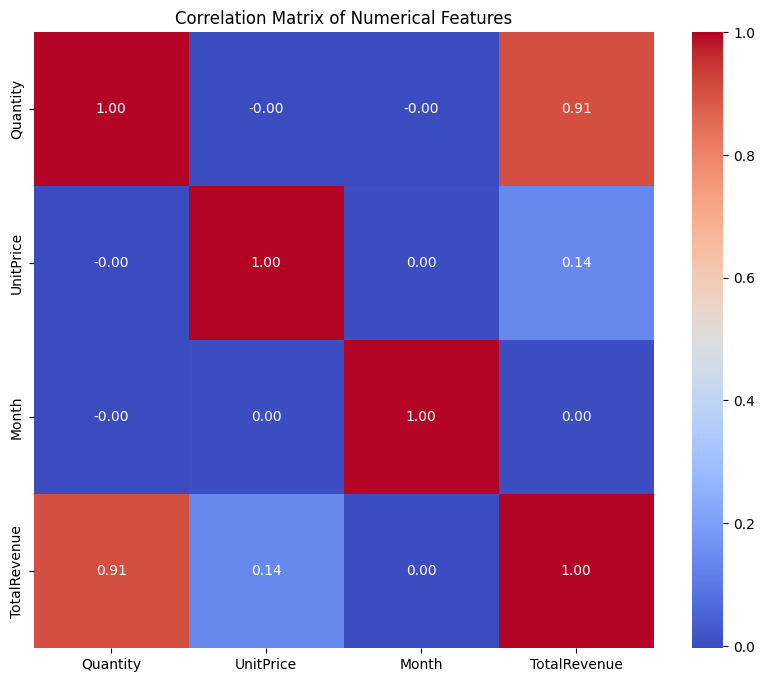

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/drive/MyDrive/retail_with_month_year.csv")

# Calculate the correlation matrix
correlation_matrix = data[['Quantity', 'UnitPrice', 'Month', 'TotalRevenue']].corr()

# Print the correlation matrix
print(correlation_matrix.to_markdown(numalign="left", stralign="left"))

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##**Interpretasi Hasil Korelasi:**

### **:📍Quantity dan TotalRevenue (0.91)::**
Korelasi positif yang sangat kuat. Ini menunjukkan bahwa jumlah barang yang dibeli memiliki pengaruh yang sangat besar terhadap total pendapatan. Semakin banyak barang yang dibeli, semakin tinggi total pendapatannya.
### **📍UnitPrice dan TotalRevenue (0.14):**
Korelasi positif yang lemah. Ini menunjukkan bahwa harga satuan barang memiliki pengaruh yang kecil terhadap total pendapatan.
### **📍Month dan TotalRevenue (0.00):**
Tidak ada korelasi. Ini menunjukkan bahwa bulan tidak memiliki pengaruh terhadap total pendapatan.
### **📍Quantity dan UnitPrice (-0.00):**
Tidak ada korelasi. Ini menunjukkan bahwa jumlah barang yang dibeli tidak memiliki hubungan dengan harga satuan barang.
Rekomendasi Fitur untuk Training Pemodelan:

Berdasarkan hasil analisis korelasi, fitur-fitur yang paling berpengaruh terhadap TotalRevenue adalah:

**Quantity:** Fitur ini memiliki korelasi yang sangat kuat dengan TotalRevenue, sehingga menjadi prediktor yang sangat baik.
**UnitPrice:** Fitur ini memiliki korelasi yang lemah dengan TotalRevenue, tetapi masih dapat memberikan informasi tambahan yang berguna bagi model.
Fitur yang Tidak Disarankan:

# **Modelling menggunakan Algoritma Sederhana**

In [ ]:
# Pisahkan data berdasarkan tahun
data_2010 = data[data['Year'] == 2010]
data_2011 = data[data['Year'] == 2011]

In [ ]:
# Persiapan data latih
X_train = data_2010[['Quantity', 'UnitPrice']]
y_train = data_2010['TotalRevenue']

In [ ]:
# Persiapan data uji
X_test = data_2011[['Quantity', 'UnitPrice']]
y_test = data_2011['TotalRevenue']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Inisialisasi dan latih model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1.1763340836717098
Mean Squared Error: 71998.12105758426
R-squared: 0.0827450188335852


<ipython-input-115-e18ca634aa02>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/retail_with_month_year.csv")
<ipython-input-115-e18ca634aa02>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2011['PredictedTotalRevenue'] = y_pred


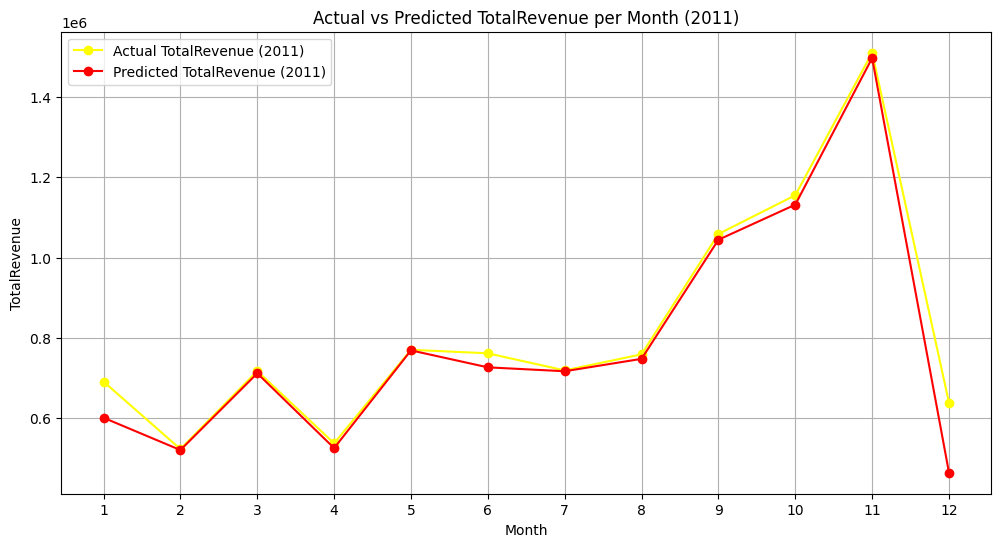

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/drive/MyDrive/retail_with_month_year.csv")

# Pisahkan data berdasarkan tahun
data_2010 = data[data['Year'] == 2010]
data_2011 = data[data['Year'] == 2011]

# Persiapan data latih
X_train = data_2010[['Quantity', 'UnitPrice']]
y_train = data_2010['TotalRevenue']

# Persiapan data uji
X_test = data_2011[['Quantity', 'UnitPrice']]
y_test = data_2011['TotalRevenue']

# Inisialisasi dan latih model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Tambahkan hasil prediksi ke DataFrame data_2011
data_2011['PredictedTotalRevenue'] = y_pred

# Kelompokkan data berdasarkan bulan dan hitung total revenue
actual_revenue = data_2011.groupby('Month')['TotalRevenue'].sum()
predicted_revenue = data_2011.groupby('Month')['PredictedTotalRevenue'].sum()

# Visualisasi hasil prediksi vs aktual per bulan
plt.figure(figsize=(12, 6))
plt.plot(actual_revenue.index, actual_revenue.values, marker='o', color='yellow', label='Actual TotalRevenue (2011)')
plt.plot(predicted_revenue.index, predicted_revenue.values, marker='o', color='red', label='Predicted TotalRevenue (2011)')

plt.xlabel("Month")
plt.ylabel("TotalRevenue")
plt.title("Actual vs Predicted TotalRevenue per Month (2011)")
plt.xticks(range(1, 13))  # Set ticks untuk bulan 1-12
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv("/content/drive/MyDrive/retail_with_month_year.csv", low_memory=False)

# Pisahkan data berdasarkan tahun
data_2010_2011 = data[data['Year'].isin([2010, 2011])]

# Persiapan data latih
X_train = data_2010_2011[['Quantity', 'UnitPrice']]
y_train = data_2010_2011['TotalRevenue']

# Inisialisasi dan latih model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hitung rata-rata Quantity dan UnitPrice tahun 2011
mean_quantity_2011 = data[data['Year'] == 2011]['Quantity'].mean()
mean_unitprice_2011 = data[data['Year'] == 2011]['UnitPrice'].mean()

# Buat data buatan tahun 2012
# Asumsikan jumlah transaksi sama dengan tahun 2011
num_transactions_2011 = len(data[data['Year'] == 2011])
data_2012 = pd.DataFrame({
    'Quantity': [mean_quantity_2011] * num_transactions_2011,
    'UnitPrice': [mean_unitprice_2011] * num_transactions_2011
})

# Prediksi TotalRevenue tahun 2012
y_pred_2012 = model.predict(data_2012)

# Tambahkan hasil prediksi ke DataFrame data_2012
data_2012['PredictedTotalRevenue'] = y_pred_2012

# Cetak hasil prediksi
print("Predicted TotalRevenue for 2012:")
print(data_2012['PredictedTotalRevenue'].sum())

Predicted TotalRevenue for 2012:
20177581.49279998


# **Modelling dengan Deep Learning LSTM**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


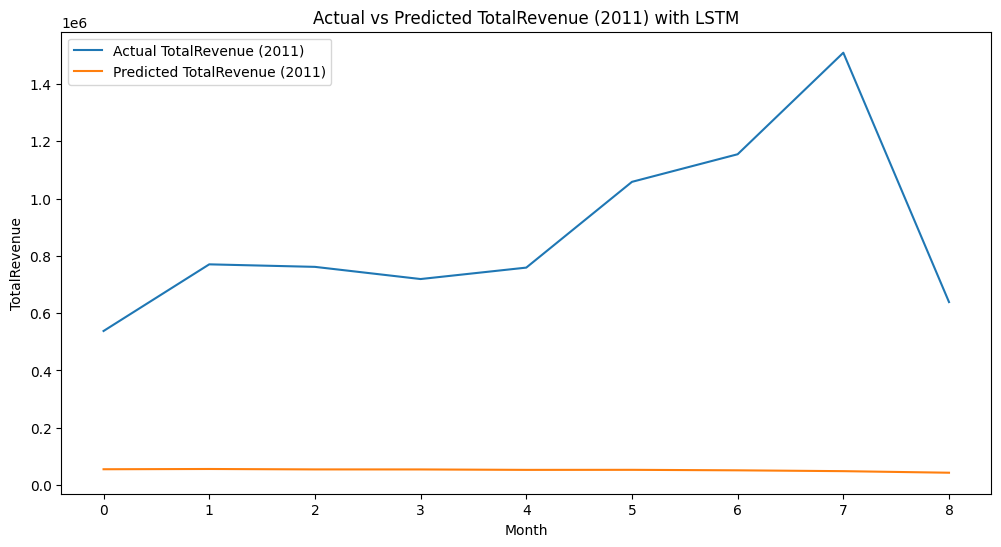

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/drive/MyDrive/retail_with_month_year.csv", low_memory=False)

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract Year and Month
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

# Group by Month and Year
monthly_data = data.groupby(['Year', 'Month'])['TotalRevenue'].sum().reset_index()

# Pivot data
pivot_data = monthly_data.pivot(index='Month', columns='Year', values='TotalRevenue')

# Fill missing values with 0
pivot_data = pivot_data.fillna(0)

# Prepare data for LSTM
data_2010 = pivot_data[2010].values.reshape(-1, 1)
data_2011 = pivot_data[2011].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
data_2010_scaled = scaler.fit_transform(data_2010)
data_2011_scaled = scaler.transform(data_2011)

# Create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 3
X_train, y_train = create_sequences(data_2010_scaled, seq_length)
X_test, y_test = create_sequences(data_2011_scaled, seq_length)

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test = scaler.inverse_transform(y_test)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual TotalRevenue (2011)')
plt.plot(y_pred, label='Predicted TotalRevenue (2011)')
plt.xlabel('Month')
plt.ylabel('TotalRevenue')
plt.title('Actual vs Predicted TotalRevenue (2011) with LSTM')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Load the data
df_analysis = pd.read_csv("/content/drive/MyDrive/retail_with_month_year.csv", low_memory=False)

# Convert InvoiceDate to datetime
df_analysis['InvoiceDate'] = pd.to_datetime(df_analysis['InvoiceDate'])

# Buat kolom RevenuePerItem
df_analysis['RevenuePerItem'] = df_analysis['TotalRevenue'] / df_analysis['Quantity']

# Buat kolom ValuePerItem
df_analysis['ValuePerItem'] = df_analysis['Quantity'] * df_analysis['UnitPrice']

# Isi nilai NaN dengan 0 setelah perhitungan untuk menghindari error
df_analysis.fillna(0, inplace=True)

# Fungsi untuk log transformation (menangani nilai 0 dan negatif)
def log_transform(series):
    return np.log1p(series)

# Terapkan log transformation pada kolom-kolom yang diinginkan
columns_to_transform = ['Quantity', 'UnitPrice', 'TotalRevenue', 'RevenuePerItem', 'ValuePerItem']

for col in columns_to_transform:
    df_analysis[f'{col}_log'] = log_transform(df_analysis[col])

# Tampilkan 5 baris pertama setelah transformasi
print(df_analysis.head().to_markdown(index=False, numalign="left", stralign="left"))

| InvoiceNo   | StockCode   | Description                         | Quantity   | InvoiceDate         | UnitPrice   | CustomerID   | Country        | TotalRevenue   | YearMonth   | Month   | Year   | RevenuePerItem   | ValuePerItem   | Quantity_log   | UnitPrice_log   | TotalRevenue_log   | RevenuePerItem_log   | ValuePerItem_log   |
|:------------|:------------|:------------------------------------|:-----------|:--------------------|:------------|:-------------|:---------------|:---------------|:------------|:--------|:-------|:-----------------|:---------------|:---------------|:----------------|:-------------------|:---------------------|:-------------------|
| 536365      | 85123A      | WHITE HANGING HEART T-LIGHT HOLDER  | 6          | 2010-12-01 08:26:00 | 2.55        | 17850        | United Kingdom | 15.3           | 2010-12     | 12      | 2010   | 2.55             | 15.3           | 1.94591        | 1.26695         | 2.79117            | 1.26695              | 2.79117         

In [ ]:
df_train = df_analysis[df_analysis['InvoiceDate'].dt.year == 2010]  # Data training
df_val = df_analysis[df_analysis['InvoiceDate'].dt.year == 2011]    # Data validasi

In [ ]:
# 📌 4. Normalisasi Data dengan MinMaxScaler
features = ['Quantity_log', 'UnitPrice_log', 'RevenuePerItem_log', 'ValuePerItem_log']
target = 'TotalRevenue_log'  # Target dalam skala log


In [ ]:
X_train = df_train[features].values
y_train = df_train[target].values

X_val = df_val[features].values
y_val = df_val[target].values

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 📌 8. Normalisasi Data dengan MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)  # Gunakan transformasi yang sama untuk validasi


In [ ]:
timesteps = 10  # Gunakan 10 hari sebelumnya untuk memprediksi hari berikutnya


In [ ]:
# Fungsi untuk ubah ke format LSTM
def create_sequences(X, y, timesteps):
    X_seq, y_seq = [], []
    for i in range(timesteps, len(X)):
        X_seq.append(X[i - timesteps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_train_lstm, y_train_lstm = create_sequences(X_train, y_train, timesteps)
X_val_lstm, y_val_lstm = create_sequences(X_val, y_val, timesteps)

# Cek bentuk akhir sebelum masuk ke model
print("Shape of X_train:", X_train_lstm.shape)  # (samples, timesteps, features)
print("Shape of y_train:", y_train_lstm.shape)  # (samples,)
print("Shape of X_val:", X_val_lstm.shape)  # (samples, timesteps, features)
print("Shape of y_val:", y_val_lstm.shape)  # (samples,)


Shape of X_train: (41470, 10, 4)
Shape of y_train: (41470,)
Shape of X_val: (488614, 10, 4)
Shape of y_val: (488614,)


In [ ]:
print(len(X_train_lstm), len(y_train))  # Pastikan outputnya sama
print(len(X_val_lstm), len(y_val))      # Pastikan juga untuk data validasi


41470 41480
488614 488624


In [ ]:
y_train = y_train[:len(X_train_lstm)]
y_val = y_val[:len(X_val_lstm)]
print(len(X_train_lstm), len(y_train))  # Harus sama
print(len(X_val_lstm), len(y_val))      # Harus sama


41470 41470
488614 488614


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Definisikan model yang lebih ringan
model = Sequential()

# Satu layer LSTM (lebih kecil)
model.add(LSTM(units=32, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))  # Regularisasi untuk menghindari overfitting

# Fully Connected Layer lebih sederhana
model.add(Dense(8, activation='relu'))
model.add(Dense(1))  # Output layer

# Kompilasi model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Ringkasan model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 5,009 (19.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_lstm, y_train, epochs=100, batch_size=32,
          validation_data=(X_val_lstm, y_val),
          callbacks=[early_stop])


Epoch 1/100
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - loss: 1.2962 - mae: 0.7828 - val_loss: 0.1059 - val_mae: 0.2518
Epoch 2/100
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - loss: 0.1301 - mae: 0.2734 - val_loss: 0.0940 - val_mae: 0.2646
Epoch 3/100
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - loss: 0.0716 - mae: 0.2043 - val_loss: 0.0227 - val_mae: 0.1139
Epoch 4/100
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - loss: 0.0489 - mae: 0.1682 - val_loss: 0.0182 - val_mae: 0.1025
Epoch 5/100
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - loss: 0.0349 - mae: 0.1407 - val_loss: 0.0110 - val_mae: 0.0748
Epoch 6/100
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - loss: 0.0251 - mae: 0.1183 - val_loss: 0.0085 - val_mae: 0.0665
Epoch 7/100
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 46s 36ms/step - loss: 0.0211 - mae: 0.1097 - val_loss: 0.0135 - val_mae: 0.0855
Epoch 8/100
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - loss: 0.0183 - mae: 0.1003 - val_loss: 0.0073 - val_mae: 0.0694
Epoch 9/100
1296

In [ ]:
model.save("model_lstm.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load model dengan mendefinisikan loss function secara eksplisit
model = load_model("/content/drive/MyDrive/model_lstm.h5", custom_objects={'mse': MeanSquaredError()})


In [ ]:
# Prediksi menggunakan model yang telah dimuat
y_pred = model.predict(X_val_lstm)

# Konversi hasil prediksi dari skala log ke nilai asli
y_pred_actual = np.expm1(y_pred)  # Karena sebelumnya pakai log transformation
y_actual = np.expm1(y_val)  # Data asli yang dipakai untuk validasi

# Cek beberapa hasil pertama
print("Prediksi pertama:", y_pred_actual[:10].flatten())
print("Data asli pertama:", y_actual[:10])

15270/15270 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step
Prediksi pertama: [17.492796  10.59983   11.281374   9.975004  12.494067  19.159266
 18.890638  17.54213   17.642122  15.8245125]
Data asli pertama: [19.5 10.5 10.5 10.5 12.5 19.5 19.5 17.4 17.7 15.6]


In [ ]:
# Prediksi menggunakan model yang telah dimuat
y_pred = model.predict(X_val_lstm)

# Konversi hasil prediksi dari skala log ke nilai asli
y_pred_actual = np.expm1(y_pred)  # Karena sebelumnya pakai log transformation
y_actual = np.expm1(y_val)  # Data asli yang dipakai untuk validasi

# Cek beberapa hasil pertama
print("Prediksi pertama:", y_pred_actual[:10].flatten())
print("Data asli pertama:", y_actual[:10])


15270/15270 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step
Prediksi pertama: [19.312164 10.236742 10.578905 10.219508 12.690019 19.573317 19.285421
 17.402065 17.7159   15.675038]
Data asli pertama: [19.5 10.5 10.5 10.5 12.5 19.5 19.5 17.4 17.7 15.6]


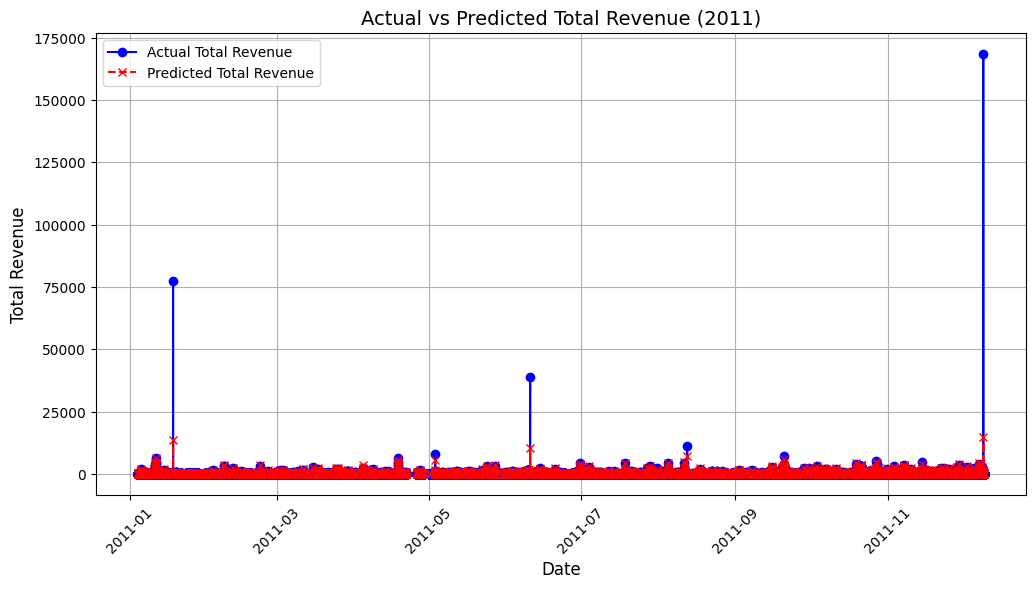

In [ ]:
# Sesuaikan panjang data biar sama
df_val_sorted = df_val_sorted.iloc[:len(y_actual)]  # Potong ke panjang yang lebih pendek

# Buat plot
plt.figure(figsize=(12, 6))
plt.plot(df_val_sorted["InvoiceDate"], y_actual, label="Actual Total Revenue", marker="o", linestyle="-", color="blue")
plt.plot(df_val_sorted["InvoiceDate"], y_pred_actual, label="Predicted Total Revenue", marker="x", linestyle="--", color="red")

# Tambahkan detail visualisasi
plt.title("Actual vs Predicted Total Revenue (2011)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
print("Panjang df_val_sorted:", len(df_val_sorted["InvoiceDate"]))
print("Panjang y_actual:", len(y_actual))
print("Panjang y_pred_actual:", len(y_pred_actual))


Panjang df_val_sorted: 488624
Panjang y_actual: 488614
Panjang y_pred_actual: 488614


# **PREDIKSI TOTALREVENUE 2012-2025📍**

Menggunakan Data Terakhir di 2011 sebagai Input Awal
Prediksi Januari 2012 → Gunakan Hasilnya untuk Prediksi Februari 2012 → dst.
Simpan dan Visualisasikan Hasil Prediksi**

In [ ]:
!ls -lh model_lstm.h5


-rw-r--r-- 1 root root 94K Feb 21 02:43 model_lstm.h5


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load model dengan eksplisit mendefinisikan loss function
model = load_model("model_lstm.h5", custom_objects={'mse': MeanSquaredError})

In [ ]:
model = load_model("model_lstm.h5", compile=False)

In [ ]:
model.compile(optimizer="adam", loss="mse")

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load model LSTM
model = load_model("model_lstm.h5", compile=False)  # Load tanpa kompilasi ulang
model.compile(optimizer="adam", loss="mse")  # Kompilasi ulang

# Load dataset
file_path = "/content/drive/MyDrive/retail_with_month_year.csv"
df = pd.read_csv(file_path)

# Pastikan kolom tahun dan total revenue ada
df = df[['Year', 'TotalRevenue']]

# Ambil data 2010-2011 untuk prediksi
df_train = df[df['Year'].isin([2010, 2011])]

# Normalisasi data jika perlu
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train[['TotalRevenue']])

# Ubah data ke dalam bentuk yang sesuai untuk LSTM (timesteps)
timesteps = 12  # Misal pakai 12 bulan terakhir untuk prediksi bulan berikutnya
X_pred = []
for i in range(len(df_train_scaled) - timesteps):
    X_pred.append(df_train_scaled[i:i+timesteps])

X_pred = np.array(X_pred)

# Prediksi tahun 2012
predictions = model.predict(X_pred)

# Konversi prediksi ke skala asli
predictions_actual = scaler.inverse_transform(predictions)

# Simpan hasil ke DataFrame
df_pred_2012 = pd.DataFrame({
    "Month": list(range(1, len(predictions_actual) + 1)),
    "Predicted_TotalRevenue": predictions_actual.flatten()
})

# Tampilkan hasil prediksi
print(df_pred_2012)

# Simpan hasil prediksi
df_pred_2012.to_csv("/content/drive/MyDrive/predicted_total_revenue_2012.csv", index=False)

<ipython-input-56-44e60c92232f>:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


16566/16566 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step
         Month  Predicted_TotalRevenue
0            1             574068.8125
1            2             574074.1250
2            3             574073.1250
3            4             574066.0625
4            5             574065.0625
...        ...                     ...
530087  530088             574331.0625
530088  530089             574101.9375
530089  530090             574037.7500
530090  530091             574027.3750
530091  530092             574022.3125

[530092 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load model LSTM
model = load_model("model_lstm.h5", compile=False)  # Load tanpa kompilasi ulang
model.compile(optimizer="adam", loss="mse")  # Kompilasi ulang

# Load dataset
file_path = "/content/drive/MyDrive/retail_with_month_year.csv"
df = pd.read_csv(file_path)

# Pastikan kolom tahun dan total revenue ada
df = df[['Year', 'TotalRevenue']]

# Ambil data 2010-2011 untuk prediksi
df_train = df[df['Year'].isin([2010, 2011])]

# Normalisasi data
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train[['TotalRevenue']])

# Ubah data ke dalam bentuk yang sesuai untuk LSTM (timesteps)
timesteps = 12  # Gunakan 12 bulan terakhir untuk prediksi bulan berikutnya
X_pred = [df_train_scaled[-timesteps:]]  # Mulai dari data terakhir 2011

# Buat list untuk menyimpan prediksi
predictions_actual = []

# Prediksi dari 2012 sampai 2025 (14 tahun)
start_year = 2012
end_year = 2025
months_to_predict = (end_year - start_year + 1) * 12

for i in range(months_to_predict):
    # Prediksi bulan berikutnya
    pred = model.predict(np.array(X_pred))

    # Simpan hasil prediksi
    predictions_actual.append(pred[0, 0])

    # Update input dengan hasil prediksi terbaru
    X_pred = [np.vstack((X_pred[0][1:], pred))]  # Geser window ke depan

# Konversi hasil prediksi ke skala asli
predictions_actual = scaler.inverse_transform(np.array(predictions_actual).reshape(-1, 1))

# Buat DataFrame hasil prediksi
months = list(range(1, months_to_predict + 1))
years = [start_year + (m - 1) // 12 for m in months]
df_pred = pd.DataFrame({
    "Year": years,
    "Month": [m % 12 if m % 12 != 0 else 12 for m in months],
    "Predicted_TotalRevenue": predictions_actual.flatten()
})

# Tampilkan hasil prediksi
print(df_pred.head(30))  # Lihat 30 data pertama

# Simpan hasil prediksi ke file CSV
df_pred.to_csv("/content/drive/MyDrive/predicted_total_revenue_2012_2025.csv", index=False)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model_lstm.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

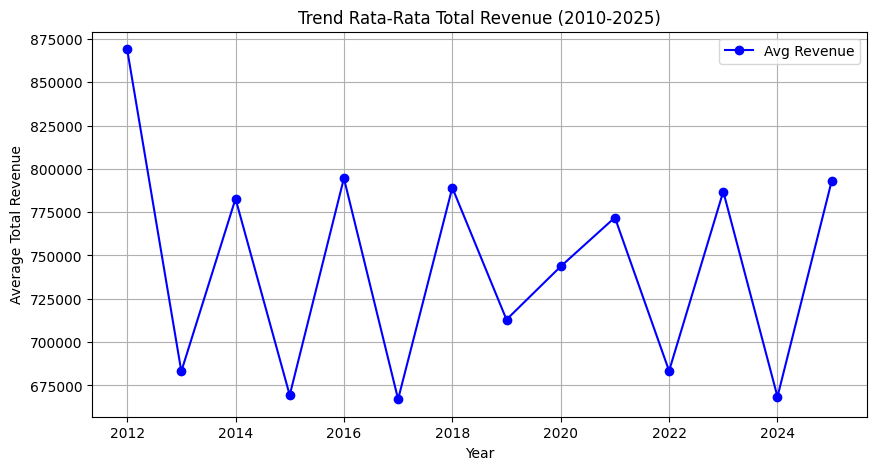

In [ ]:
import matplotlib.pyplot as plt

# Hitung rata-rata Total Revenue per tahun
df_avg_revenue = df_pred.groupby("Year")["Predicted_TotalRevenue"].mean().reset_index()

# Plot grafik garis
plt.figure(figsize=(10, 5))
plt.plot(df_avg_revenue["Year"], df_avg_revenue["Predicted_TotalRevenue"], marker="o", linestyle="-", color="b", label="Avg Revenue")

# Tambahkan label dan judul
plt.xlabel("Year")
plt.ylabel("Average Total Revenue")
plt.title("Trend Rata-Rata Total Revenue (2010-2025)")
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()


In [ ]:
pd.read_csv('/content/drive/MyDrive/predicted_total_revenue_2012_2025.csv')

,Year,Month,Predicted_TotalRevenue
0,2012,1,574017.50
1,2012,2,599527.80
2,2012,3,733432.25
3,2012,4,755165.50
4,2012,5,878637.94
...,...,...,...
163,2025,8,762349.90
164,2025,9,722905.60
165,2025,10,703582.40
166,2025,11,690387.56


<span style="font-family: Courier; font-size: 16px;">
Grafik menunjukkan bahwa rata-rata pendapatan total mengalami fluktuasi yang cukup besar dari tahun ke tahun. Ini mengindikasikan adanya faktor-faktor yang mempengaruhi penjualan secara signifikan, seperti kondisi ekonomi, perubahan tren pasar, atau faktor internal perusahaan.
</span>




---


*   Fluktuasi yang terlihat pada grafik mengindikasikan adanya perubahan signifikan dalam fitur-fitur yang mempengaruhi pendapatan.

*   Penurunan tajam pada tahun-tahun tertentu mungkin disebabkan oleh penurunan drastis dalam 'Quantity' (jumlah barang terjual) atau 'ValuePerItem' (nilai total per barang).
Sebaliknya, lonjakan pendapatan bisa disebabkan oleh peningkatan tajam dalam 'Quantity' atau 'UnitPrice' (harga satuan).
Pola siklus yang terlihat bisa mencerminkan pola musiman dalam permintaan

* produk, perubahan strategi harga, atau fluktuasi dalam biaya produksi.
*  Perubahan kondisi ekonomi, seperti resesi atau inflasi, dapat mempengaruhi daya beli konsumen dan berdampak pada 'Quantity' dan 'UnitPrice'.
*  Perubahan tren pasar atau persaingan dapat mempengaruhi permintaan produk dan berdampak pada 'Quantity' dan 'RevenuePerItem' (pendapatan per barang).
* Faktor internal perusahaan, seperti strategi pemasaran, kebijakan harga, atau efisiensi operasional, juga dapat mempengaruhi fitur-fitur tersebut.








